In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Run to check what gpu is being used
!nvidia-smi

Mon Mar  1 02:28:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [6]:
#Using grayscale images
in_channel = 1

img_rows, img_cols = 100, 100
steps = 550
num_images = 70000
num_targets = 4 

In [7]:
import h5py
import numpy as np #Numpy again because the dependency from other file
import pandas as pd
from sklearn.model_selection import train_test_split

filename = '/content/drive/MyDrive/loadwalks.py'
exec(open(filename).read())

walk_imgs,count_imgs = read_many_hdf5()

x_train_Walks, x_test_Walks, x_train_Counts, x_test_Counts, y_train_Walks, y_test_Walks = process_loaded_data(img_rows, img_cols,in_channel)

In [8]:
x_train_Counts = tf.keras.utils.normalize(x_train_Counts, axis = 1)
x_test_Counts = tf.keras.utils.normalize(x_test_Counts, axis = 1)

In [9]:
#Remove in_channel variable since not needed for feedforward network
x_train_Counts = x_train_Counts.reshape(x_train_Counts.shape[0], img_rows, img_cols)
x_test_Counts = x_test_Counts.reshape(x_test_Counts.shape[0], img_rows, img_cols)

print(x_train_Counts.shape)
print(x_test_Counts.shape)

(60000, 100, 100)
(10000, 100, 100)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


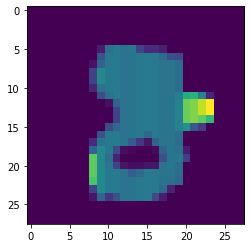

In [23]:
n = 55555
plt.imshow(x_train[n])
print(y_train[n])

In [11]:
h = 36 #precise padding amount

#Loop to fit output shape for multitask net
for i in range(10):
  y_train_Walks[5+i] = np.zeros(60000)
  y_test_Walks[5+i] = np.zeros(10000)

#Pad images to make MNIST data larger
padded_x_train = np.pad(x_train, h) #New image is 100x100
padded_x_test = np.pad(x_test, h)

print(padded_x_train.shape)
print(padded_x_test.shape)

(60072, 100, 100)
(10072, 100, 100)


3


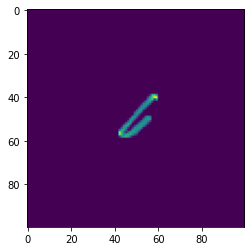

In [12]:
n = 59964
#padded_x_train = padded_x_train[:-35]
plt.imshow(padded_x_train[n])
print(y_train[n])

In [13]:
#Remove additional empty data from beginning and end respectively 
padded_x_train = np.delete(padded_x_train,range(36), axis = 0)
padded_x_test = np.delete(padded_x_test,range(36), axis = 0)
padded_x_train = padded_x_train[:-36]
padded_x_test = padded_x_test[:-36]
#Verify training dimensions
print(padded_x_train.shape)
print(padded_x_test.shape)

(60000, 100, 100)
(10000, 100, 100)


(60000, 100, 100)
(10000, 100, 100)


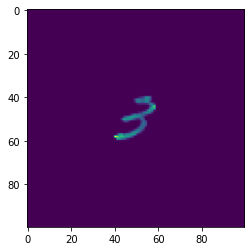

In [14]:
plt.imshow(padded_x_train[n])
print(padded_x_train.shape)
print(padded_x_test.shape)

In [15]:
from sklearn.preprocessing import OneHotEncoder
ytrain = y_train.reshape(-1,1)
ytest = y_test.reshape(-1,1)

y1 = OneHotEncoder().fit_transform(ytrain).toarray()
y2 = OneHotEncoder().fit_transform(ytest).toarray()

y1.reshape(60000,10)
y2.reshape(10000,10)

#Extend the MNIST targets by four
large_ytrain = []
large_ytest = []
for i in range(len(y1)):
  large_ytrain.append(np.insert(y1[i],0,np.zeros(4)))
for i in range(len(y2)):
  large_ytest.append(np.insert(y2[i],0,np.zeros(4)))

y_train = np.array(large_ytrain)
y_test = np.array(large_ytest)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


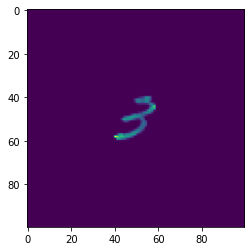

In [16]:
print(y_train[n])
plt.imshow(padded_x_train[n])

In [17]:
y_train_Walks.shape

(60000, 14)

In [18]:
path = '/content/drive/My Drive/CapstoneWalks/Y_Testing_Data.h5'

filename = '/content/drive/MyDrive/loadwalks.py'
exec(open(filename).read())

CombineProcessedData(y_test,y_test_Walks,path,1)

completed


In [19]:
path = '/content/drive/My Drive/CapstoneWalks/X_Testing_Data.h5'

filename = '/content/drive/MyDrive/loadwalks.py'
exec(open(filename).read())

CombineProcessedData(padded_x_test,x_test_Counts,path,0)

completed


In [20]:
path = '/content/drive/My Drive/CapstoneWalks/Y_Train_Data.h5'

filename = '/content/drive/MyDrive/loadwalks.py'
exec(open(filename).read())

CombineProcessedData(y_train,y_train_Walks,path,1)

completed


In [21]:
path = '/content/drive/My Drive/CapstoneWalks/X_Train_Data.h5'

filename = '/content/drive/MyDrive/loadwalks.py'
exec(open(filename).read())

CombineProcessedData(padded_x_train,x_train_Counts,path,0)

completed
